In [1]:
# ! pip install spacy matplotlib wordcloud pyldavis -U

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Visualizing the dependency parse

In [3]:
import spacy
from spacy import displacy
from pathlib import Path

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
def visualize(doc, is_list=False):
    options = {"add_lemma": True,
    "compact": True,
    "color": "green",
    "collapse_punct": True,
    "arrow_spacing": 20,
    "bg": "#FFFFE6",
    "font": "Times",
    "distance": 120}
    
    if (is_list):
        displacy.serve(list(doc.sents), style='dep', options=options)
    else:
        displacy.serve(doc, style='dep', options=options)

In [6]:
short_text = "The great diversity of life today evolved \
from less-diverse ancestral organisms over billions of \
years."

In [7]:
doc = nlp(short_text)
visualize(doc)


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [8]:
long_text = '''To Sherlock Holmes she is always _the_
woman. I have seldom heard him mention her under any
other name. In his eyes she eclipses and predominates the
whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that
one particularly, were abhorrent to his cold, precise
but admirably balanced mind. He was, I take it, the most
perfect reasoning and observing machine that the world
has seen, but as a lover he would have placed himself in
a false position. He never spoke of the softer passions,
save with a gibe and a sneer. They were admirable things
for the observer—excellent for drawing the veil from
men's motives and actions. But for the trained reasoner
to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting
factor which might throw a doubt upon all his mental
results. Grit in a sensitive instrument, or a crack in
one of his own high-power lenses, would not be more
disturbing than a strong emotion in a nature such as his.
And yet there was but one woman to him, and that woman
was the late Irene Adler, of dubious and questionable
memory.'''

In [9]:
doc = nlp(long_text)
visualize(doc, is_list=True)


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [10]:
def save_dependency_parse(doc, path):
    output_path = Path(path)
    svg = displacy.render(doc, style="dep",
    jupyter=False)
    output_path.open("w", encoding="utf-8").write(svg)

In [11]:
text = "The great diversity of life evolved from lessdiverse ancestral organisms."
doc = nlp(text)
save_dependency_parse(doc, "dependency_parse.svg")

## Visualizing parts of speech

In [12]:
import sys
sys.path.append('..')

In [13]:
import spacy
import matplotlib.pyplot as plt
from Chapter01.dividing_into_sentences import read_text_file

In [14]:
nlp = spacy.load('en_core_web_sm')
past_tags = ['VBD', 'VBN']
present_tags = ["VBG", 'VBP', 'VBZ']

In [15]:
def visualize_verbs(text_file):
    
    text = read_text_file(text_file)
    doc = nlp(text)
    verb_dict = {"Inf":0, "Past":0, "Present":0}
    
    for token in doc:
        if (token.tag_ == "VB"):
            verb_dict["Inf"] = verb_dict["Inf"] + 1
        
        if (token.tag_ in past_tags):
            verb_dict["Past"] = verb_dict["Past"] + 1
        
        if (token.tag_ in present_tags):
            verb_dict["Present"] = verb_dict["Present"] + 1
    
    plt.bar(range(len(verb_dict)),
    list(verb_dict.values()),
    align='center', color=["red","green","blue"])
    plt.xticks(range(len(verb_dict)),
    list(verb_dict.keys()))
    plt.show()

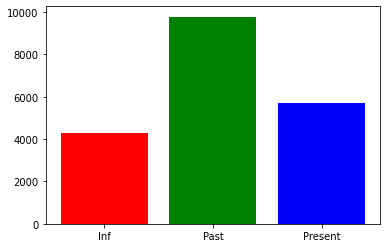

In [16]:
visualize_verbs("../Chapter01/sherlock_holmes.txt")

## Visualizing NER

In [17]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [18]:
def visualize(doc):
    colors = {"ORG":"green", "PERSON":"yellow"}
    options = {"colors": colors}
    displacy.serve(doc, style='ent', options=options)

In [19]:
text = """iPhone 12: Apple makes jump to 5G
Apple has confirmed its iPhone 12 handsets will be its
first to work on faster 5G networks. The company has also
extended the range to include a new "Mini" model that
has a smaller 5.4in screen. The US firm bucked a wider
industry downturn by increasing its handset sales over
the past year. But some experts say the new features
give Apple its best opportunity for growth since 2014,
when it revamped its line-up with the iPhone 6. "5G
will bring a new level of performance for downloads and
uploads, higher quality video streaming, more responsive
gaming, real-time interactivity and so much more," said
chief executive Tim Cook. There has also been a cosmetic
refresh this time round, with the sides of the devices
getting sharper, flatter edges. The higher-end iPhone 12
Pro models also get bigger screens than before and a new
sensor to help with low-light photography. However, for
the first time none of the devices will be bundled with
headphones or a charger."""

In [20]:
doc = nlp(text)
doc.user_data["title"] = "iPhone 12: Apple makes jump to 5G"
visualize(doc)


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [21]:
def save_ent_html(doc, path):
    html = displacy.render(doc, style="ent")
    html_file= open(path, "w", encoding="utf-8")
    html_file.write(path)
    html_file.close()

In [22]:
save_ent_html(doc, "ner_vis.html")

## Constructing word clouds

In [23]:
import sys
sys.path.append('..')

In [24]:
import os
import nltk
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from Chapter01.dividing_into_sentences import read_text_file

In [25]:
import csv
import nltk
from nltk.probability import FreqDist

In [26]:
def preprocess_text(text):
    text = text.replace("\n", " ")
    return text

In [27]:
def tokenize(text):
    return nltk.tokenize.word_tokenize(text)

In [28]:
def create_frequency_dist(words):
    fdist = FreqDist(word.lower() for word in words)
    return fdist

In [29]:
def compile_stopwords_list_frequency(text, frequency=False):
    text = preprocess_text(text)
    words = tokenize(text)
    freq_dist = create_frequency_dist(words)
    words_with_frequencies = [(word, freq_dist[word]) for word in freq_dist.keys()]
    sorted_words = sorted(words_with_frequencies, key=lambda tup: tup[1])
    if (frequency):
        stopwords = [tuple[0] for tuple in sorted_words if tuple[1] > 100] # First option: use a frequency cutoff
    else:
        length_cutoff = int(0.02*len(sorted_words)) # Second option: use a percentage of the words
        stopwords = [tuple[0] for tuple in sorted_words[-length_cutoff:]] 
    return stopwords

In [30]:
def create_wordcloud(text, stopwords, filename):
    wordcloud = WordCloud(min_font_size=10, max_font_size=100,stopwords=stopwords, width=1000,
                          height=1000, max_words=1000,background_color="white").generate(text)
    
    wordcloud.to_file(filename)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [31]:
text_file = "../Chapter01/sherlock_holmes.txt"
text = read_text_file(text_file)

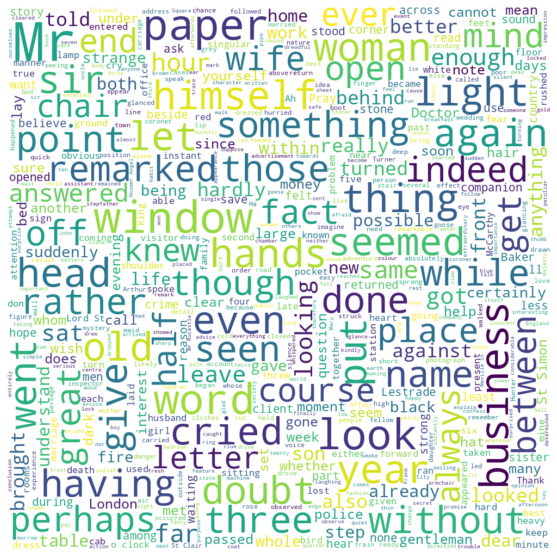

In [32]:
create_wordcloud(text,compile_stopwords_list_frequency(text),"sherlock_wc.png")

In [33]:
import numpy as np
from PIL import Image

In [34]:
def create_wordcloud(text, stopwords, filename, apply_mask=None):
    if (apply_mask is not None):
        wordcloud = WordCloud(background_color="white",
                            max_words=2000,
                            mask=apply_mask,
                            stopwords=stopwords,
                            min_font_size=10,
                            max_font_size=100)
        wordcloud.generate(text)
        wordcloud.to_file(filename)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.figure(figsize=(20,10))
        plt.imshow(apply_mask, cmap=plt.cm.gray,
        interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        wordcloud = WordCloud(min_font_size=10,
        max_font_size=100,
        stopwords=stopwords,
        width=1000,
        height=1000,
        max_words=1000,
        background_color="white")\
        .generate(text)
        wordcloud.to_file(filename)
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

In [35]:
text_file = "../Chapter01/sherlock_holmes.txt"
text = read_text_file(text_file)

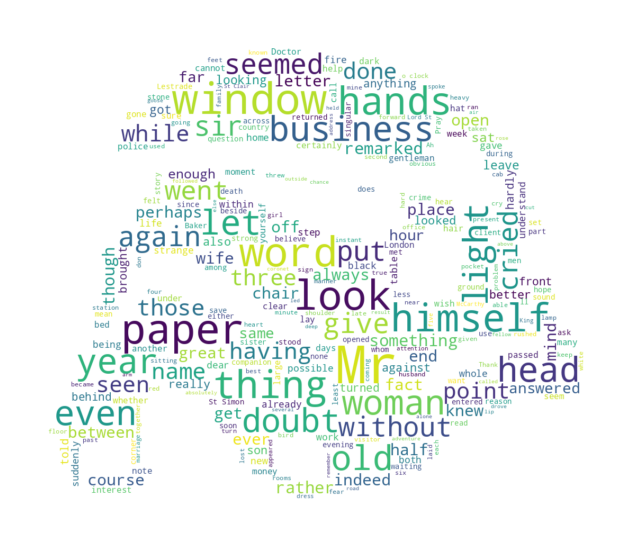

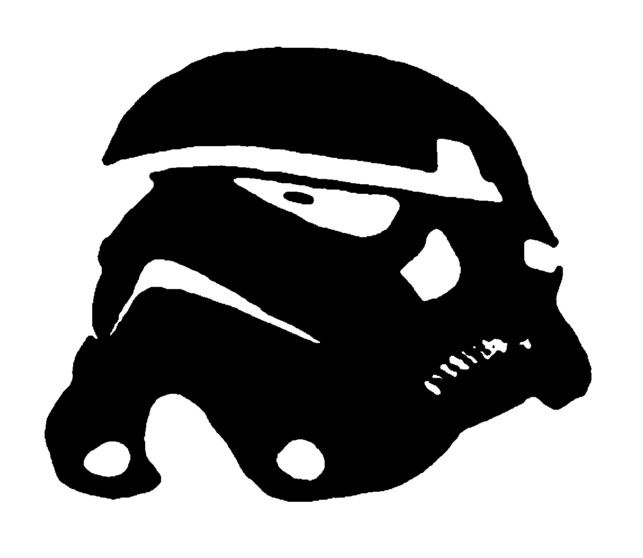

In [36]:
plt.figure(figsize=(20,10))
sherlock_data = Image.open("stormtrooper_mask.png")
sherlock_mask = np.array(sherlock_data)
create_wordcloud(text, compile_stopwords_list_frequency(text),
                 "sherlock_mask.png",apply_mask=sherlock_mask)

## Visualizing topics

In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [45]:
import gensim
import pyLDAvis.gensim


In [46]:
dictionary = gensim.corpora.Dictionary.load('../Chapter06/gensim/id2word.dict')
corpus = gensim.corpora.MmCorpus('../Chapter06/gensim/corpus.mm')
lda = gensim.models.ldamodel.LdaModel.load('../Chapter06/gensim/lda_gensim.model')

In [47]:
lda_prepared = pyLDAvis.gensim.prepare(lda, corpus, dictionary)

In [48]:
pyLDAvis.display(lda_prepared)

In [49]:
pyLDAvis.save_html(lda_prepared, 'lda.html')